# MATH 4340 / COSC 4340: Numerical Methods for Differential Equations
# Notebook 4: Runge-Kutta Methods 

### Professor: Dane Taylor
### Date: Spring 2024


In [2]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## 1.  Runge-Kutta Example


$$ y'(t) = f(t,y) = (t-y)/2
$$

In [3]:
def f(t, y):  
    return (t - y)/2
  
def RK4(ti,f,y0): 
    h = ti[1]-ti[0]
    N = len(ti)
    y = zeros(N)
    y[0] = y0 
    
    for i in range(N-1):
        k1 = f(ti[i],y[i])
        k2 = f(ti[i]+h/2, y[i] + k1*h/2) 
        k3 = f(ti[i]+h/2, y[i] + k2*h/2) 
        k4 = f(ti[i]+h, y[i] + k3*h)
        
        y[i+1] = y[i] + h * (k1 + 2*k2 + 2*k3 + k4) /6
  
    return y 

In [4]:
t0 = 0
y0 = 1
T = 10
N = 2**4 # 16
ti = linspace(t0,T,N+1)
yi_rk4 = RK4(ti,f,y0)

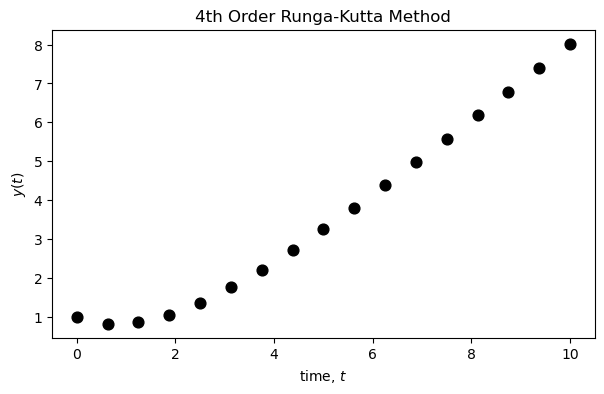

In [5]:
def make_RK4_fig(ti,yi):
    fig = plt.figure(figsize=(7,4))
    plt.scatter(ti,yi,60,'k');
    plt.title('4th Order Runga-Kutta Method');
    plt.xlabel('time, $t$');
    plt.ylabel('$y(t)$');

make_RK4_fig(ti,yi_rk4)

## 2. Study local and global errors for RK4 example
### We will use a high-resolution approximation (large $N$) approximation to estimate the errors

In [6]:
Ns = 2**array([2,4,6,8,10,12])
Ns

array([   4,   16,   64,  256, 1024, 4096])

In [7]:
ti_s = []
yi_s = []
for i, N in enumerate(Ns):
    ti_s.append(linspace(t0,T,N+1))
    yi_s.append(RK4(ti_s[-1],f,y0))

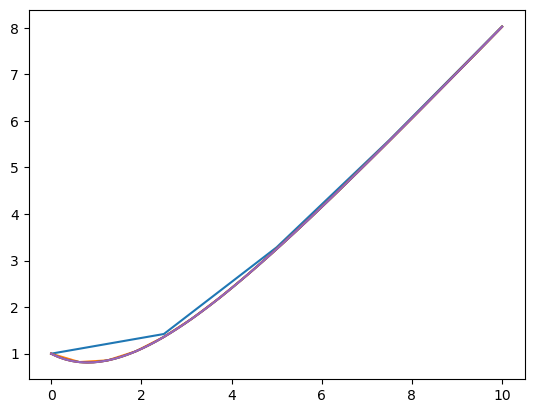

In [8]:
for i, N in enumerate(Ns[:-1]):
    plot(ti_s[i],yi_s[i])

In [9]:
global_errors = []
for i, N in enumerate(Ns[:-1]):# don't consider last N value
    global_errors.append(yi_s[i][-1] - yi_s[-1][-1])
    
    
global_errors2 = []
for i, N in enumerate(Ns[:-1]):# don't consider last N value
    global_errors2.append(yi_s[i][-1] - yi_s[i+1][-1])

In [10]:
print(global_errors)
print(global_errors2)

[0.006592914816341278, 1.0434071265663647e-05, 3.3488728234942755e-08, 1.2457412879030016e-10, 4.831690603168681e-13]
[0.006582480745075614, 1.0400582537428704e-05, 3.3364154106152455e-08, 1.240909597299833e-10, 4.831690603168681e-13]


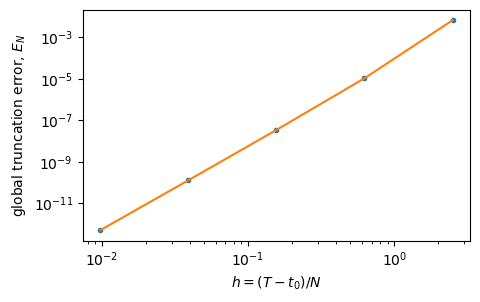

In [11]:
hs = (T-t0)/Ns[:-1]# don't consider last N value

fig, ax = plt.subplots(1,1,figsize=(5,3))

ax.loglog(hs,global_errors,'.');
ax.loglog(hs,global_errors2);
ax.set_ylabel('global truncation error, $E_N$');
ax.set_xlabel('$h=(T-t_0)/N$');

In [12]:
polyfit(log(hs), log(global_errors), 1)

array([ 4.18446384, -9.2061443 ])

In [13]:
polyfit(log(hs), log(global_errors2), 1)

array([ 4.18428377, -9.20896088])

In [14]:
print(ti_s[0][1],ti_s[5][1024])
print(ti_s[1][1],ti_s[5][256])
print(ti_s[2][1],ti_s[5][64])
print(ti_s[3][1],ti_s[5][16])
print(ti_s[4][1],ti_s[5][4])


print(ti_s[0][1],ti_s[1][4])
print(ti_s[1][1],ti_s[2][4])
print(ti_s[2][1],ti_s[3][4])
print(ti_s[3][1],ti_s[4][4])
print(ti_s[4][1],ti_s[5][4])

2.5 2.5
0.625 0.625
0.15625 0.15625
0.0390625 0.0390625
0.009765625 0.009765625
2.5 2.5
0.625 0.625
0.15625 0.15625
0.0390625 0.0390625
0.009765625 0.009765625


In [15]:
local_errors = [yi_s[0][1]-yi_s[5][1024],
      yi_s[1][1]-yi_s[5][256],
      yi_s[2][1]-yi_s[5][64],
      yi_s[3][1]-yi_s[5][16],
      yi_s[4][1]-yi_s[5][4]]
local_errors


local_errors2 = [yi_s[0][1]-yi_s[1][4],
      yi_s[1][1]-yi_s[2][4],
      yi_s[2][1]-yi_s[3][4],
      yi_s[3][1]-yi_s[4][4],
      yi_s[4][1]-yi_s[5][4]]
local_errors2

[0.06273799513312328,
 7.056472748112608e-05,
 7.155548487070007e-08,
 7.055034334513266e-11,
 6.905587213168474e-14]

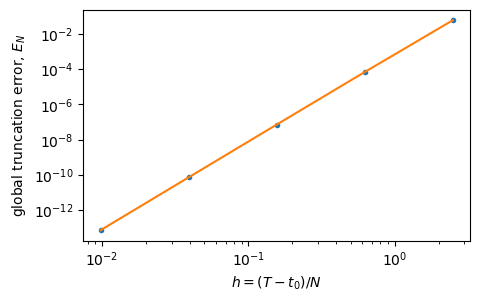

In [16]:
hs = (T-t0)/Ns[:-1]# don't consider last N value

fig, ax = plt.subplots(1,1,figsize=(5,3))

ax.loglog(hs,local_errors,'.');
ax.loglog(hs,local_errors2);
ax.set_ylabel('global truncation error, $E_N$');
ax.set_xlabel('$h=(T-t_0)/N$');

In [17]:
polyfit(log(hs), log(local_errors), 1)

array([ 4.96927342, -7.26485933])

In [18]:
polyfit(log(hs), log(local_errors2), 1)

array([ 4.96906438, -7.26775896])

## 3. Adaptive step sizes for the Trapezoid (RK2) Method

In [19]:
def trapezoidal(wi,f,w0): 
    
    h = ti[1]-ti[0]
    N = len(ti)-1
    wi = zeros(len(ti))
    wi[0] = w0
    for i in range(N):
        tilde_wi_1  = wi[i] + h*f(ti[i],wi[i])
        wi[i+1] = wi[i] + h/2*( f(ti[i],wi[i]) + f(ti[i+1],tilde_wi_1) )
        
        s1 = f(ti[i],wi[i])
        s2 = f(ti[i+1],wi[i] + h*f(ti[i],wi[i]))        
        
        wi[i+1] = wi[i] + h/2*( s1 + s2 )
        
        
    return wi


In [20]:
t0 = 0
y0 = 1
T = 10
N = 4

ti = linspace(t0,T,N+1)
yi_rk4 = RK4(ti,f,y0)
yi_trap = trapezoidal(ti,f,y0)

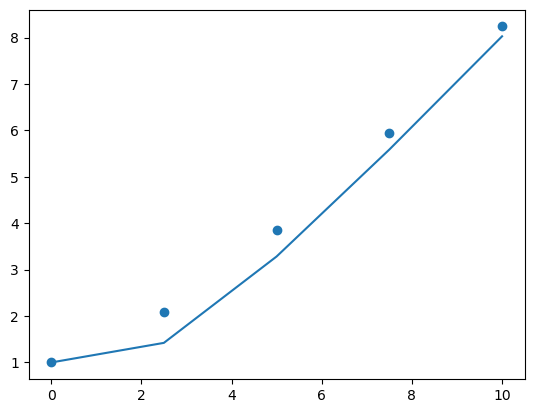

In [21]:
plot(ti,yi_rk4)
scatter(ti,yi_trap);

In [22]:
def RK2_3(ti,f,w0): # produces both a 2nd order and 3rd order approximation to the solution y(t)
    
    h = ti[1]-ti[0]
    N = len(ti)-1
    wi = zeros(len(ti))
    zi = zeros(len(ti))    
    wi[0] = w0
    zi[0] = w0
    for i in range(N):
        s1 = f(ti[i],wi[i])#slope at start
        s2 = f(ti[i+1],wi[i] + h*f(ti[i],wi[i]))#slope at end                        
        s3 = f(ti[i] + 0.5*h, wi[i] + 0.5*h*( s1 + s2 )/2 ) #slope in middle
        
        #trap method
        wi[i+1] = wi[i] + h*( s1 + s2 )/2
        
        # third order method
        zi[i+1] = zi[i] + h*( s1 + s2 + 4*s3 )/6
        
    return wi,zi


In [32]:
t0 = 0
y0 = 1
T = 10
N = 64

ti = linspace(t0,T,N+1)
yi_trap,yi_3rd = RK2_3(ti,f,y0)
yi_rk4 = RK4(ti,f,y0)

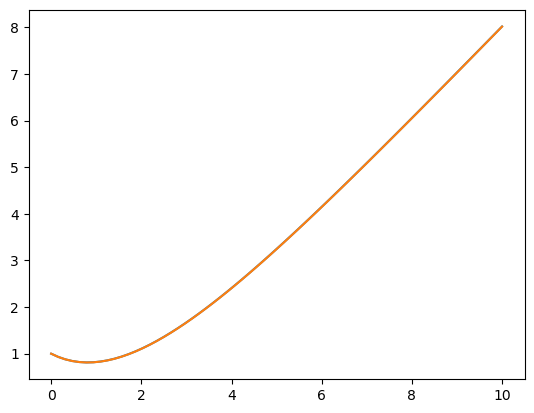

In [33]:
plot(ti,yi_trap);
plot(ti,yi_3rd);

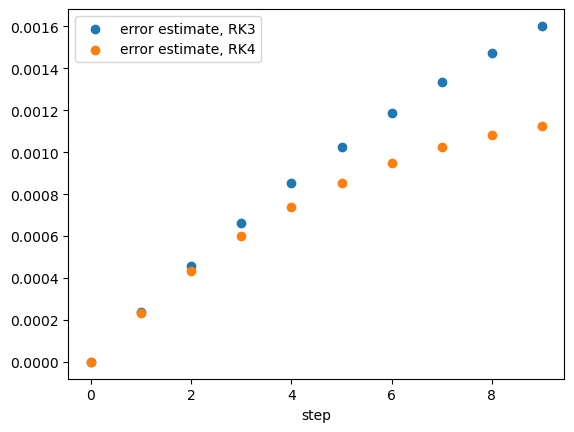

In [34]:
scatter(arange(10),abs(yi_3rd[:10]-yi_trap[:10]))
scatter(arange(10),abs(yi_rk4[:10]-yi_trap[:10]))
xlabel('step')
legend(['error estimate, RK3','error estimate, RK4'])

### local error is pretty similar whether estimated using RK4 or the 3rd-order method


In [35]:
abs(yi_3rd[1]-yi_trap[1])

0.0002384185791015625

### RK2/3 Method allows use estimate local step error as we integrate from step to step

### We could use this to adapt the step size to keep the local error down